# Comparison against ATG data

In [2]:
import os
import sys
import xarray as xr
import datetime
import scipy.io as sio
from dotenv import load_dotenv, find_dotenv

# find .env automagically by walking up directories until it's found
dotenv_path = find_dotenv()

# load up the entries as environment variables
load_dotenv(dotenv_path)

src_dir = os.environ.get('srcdir')
print(src_dir)

sys.path.append(src_dir)

# always reload modules marked with "%aimport"
%load_ext autoreload
%autoreload 1

%aimport features.compare_tide
%aimport features.grid_ttide
from features.compare_tide import compare_tide
from features.grid_ttide import grid_ttide, plot_M2O1_diff, plot_M2O1_phase

/home/ubuntu/bigStick/tidal_melting/src


In [3]:
atg_path = os.path.join(os.environ.get('projdir'),'data','analysis','external','atg','ATG_ocean_height_2010_0908.mat')
mat_content = sio.loadmat(atg_path)
atg_data = mat_content['atg']

station_list = atg_data['site_id'][0,0].squeeze()

his_path = os.path.join(os.environ.get('rawdir'),'waom10_UV','ocean_his_hourly.nc')
rds = xr.open_dataset(his_path,chunks={'xi_rho':100,'eta_rho':100})
print('Model time strat and stop: ',rds.ocean_time[0].values,rds.ocean_time[-1].values,' || samples: ',rds.ocean_time.size)

Model time strat and stop:  2007-01-02T00:00:00.000000000 2007-02-07T14:00:00.000000000  || samples:  879


## Result table with RMSE for amplitude, phase and complex amplitude at the end

In [5]:
zeta = rds.zeta
mask = rds.mask_rho
stime = datetime.datetime(2007,1,2,0)
constit_list = ['M2','O1']
stations,RMSE = compare_tide(atg_path,zeta,mask,stime=stime,constit_list=constit_list,station_list=station_list)

stime =  2007-01-02 00:00:00  constits =  ['M2', 'O1'] stations =  [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108]
processing station  1
atg lat(lon): -65.25,-64.27
roms lat(lon): -65.23,-64.19
processing station  2
atg lat(lon): -70.77,-11.87
roms lat(lon): -70.81,-11.79
processing station  3
atg lat(lon): -67.57,-68.13
roms lat(lon): -67.65,-68.03
processing station  4
atg lat(lon): -60.70,-45.60
roms lat(lon): -60.75,-45.62
processing station  5
atg lat(lon): -77.12,-49.05
roms lat(lon): -77.13,-49.04
processing station  6
atg lat(lon): -74.43,-39.40
roms lat(lon): -74.47,-39.50
processing station  

atg lat(lon): -67.95,-62.67
roms lat(lon): -67.99,-62.69
processing station  98
atg lat(lon): -68.00,-62.69
roms lat(lon): -67.99,-62.69
processing station  99
atg lat(lon): -68.55,-65.15
roms lat(lon): -68.54,-65.17
processing station  100
atg lat(lon): -74.06,-112.42
roms lat(lon): -73.97,-112.47
processing station  101
atg lat(lon): -73.82,-117.00
roms lat(lon): -73.89,-117.00
processing station  102
atg lat(lon): -73.85,-115.57
roms lat(lon): -73.88,-115.55
processing station  103
atg lat(lon): -74.61,-103.87
roms lat(lon): -74.64,-103.79
processing station  104
atg lat(lon): -75.28,-101.13
roms lat(lon): -75.26,-101.10
processing station  105
atg lat(lon): -76.31,-77.58
roms lat(lon): -76.31,-77.64
processing station  106
atg lat(lon): -76.56,-76.20
roms lat(lon): -76.60,-76.15
processing station  107
atg lat(lon): -76.70,-76.69
roms lat(lon): -76.82,-76.74
processing station  108
atg lat(lon): -76.76,-75.42
roms lat(lon): -76.84,-75.48
Amp(amp_err)[m]:  atg      roms    ||   phas

Station  5       0.28   0.29(0.01)                           23.00   174.17(1.53)
Station  6       0.32   0.24(0.01)                           7.00   151.72(1.73)
Station  7       0.30   0.26(0.01)                           6.00   156.77(1.73)
Station  8       0.29   0.22(0.01)                           347.00   130.52(1.62)
Station  9       0.29   0.21(0.01)                           352.00   133.47(1.93)
Station  10       0.31   0.21(0.01)                           359.00   136.90(2.26)
Station  11       0.17   0.15(0.00)                           57.00   156.80(1.81)
Station  12       0.19   0.11(0.00)                           50.00   171.55(2.11)
Station  13       0.27   0.32(0.01)                           80.00   228.91(1.32)
Station  14       0.17   0.13(0.00)                           53.00   142.69(1.91)
Station  15       0.22   0.14(0.00)                           51.00   170.83(1.83)
Station  16       0.20   0.17(0.01)                           49.00   177.10(1.87)
Station 

# Comparison against TPXO forcing file

In [53]:
# load tpxo forcing amplitude and phase information as Xarray dataset
tpxo_path = os.path.join(os.environ.get('rawdir'),'gdata','waom10_data','waom10_tds.nc')
dsf = xr.open_mfdataset(tpxo_path)

In [90]:
rds = grid_ttide(rds,rds,stime=stime, res=50)

setting up the new fields  ['amp', 'amp_err', 'phase', 'phase_err']  for  ['O1', 'M2']
applying t_tide to every  50 th cell


VBox(children=(HTML(value=''), IntProgress(value=0, max=50)))

interpolating intermediate cells and mask land


## Amplitude differences

/home/ubuntu/bigStick/anaconda3/envs/tidal_melting/lib/python3.6/site-packages/dask/local.py:271: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)
/home/ubuntu/bigStick/anaconda3/envs/tidal_melting/lib/python3.6/site-packages/dask/local.py:271: RuntimeWarning: divide by zero encountered in true_divide
  return func(*args2)


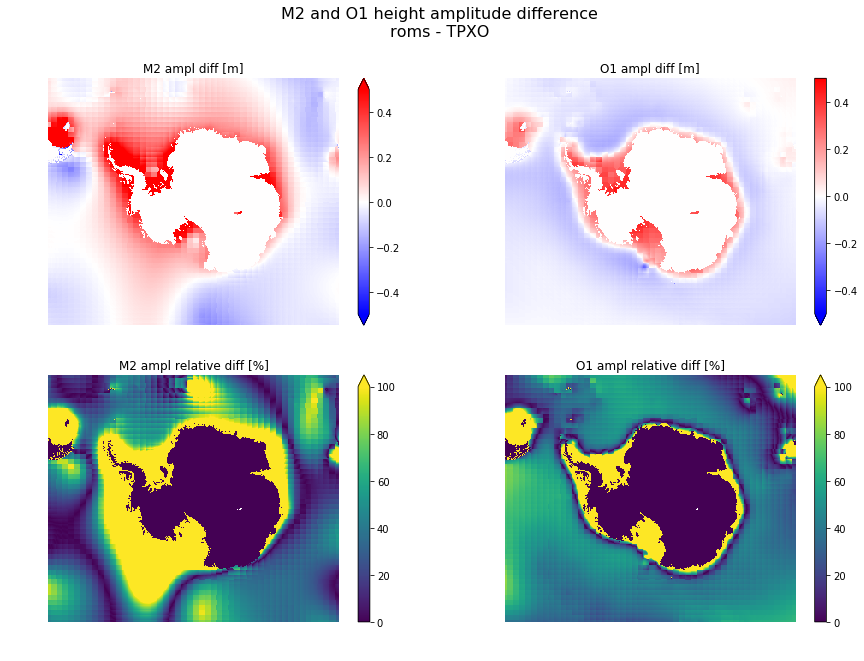

In [80]:
plot_M2O1_diff(rds,'roms',dsf,'TPXO',vmin=-0.50,vmax=0.50)

## Phase information
Lets check if the phases agree with TPXO.

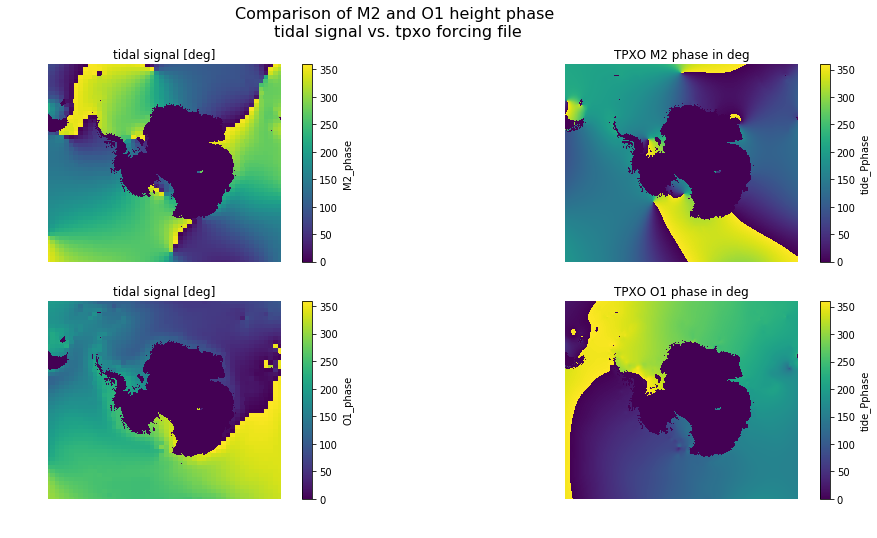

In [91]:
# plot roms phase info against tpxo
plot_M2O1_phase(rds,'tidal signal',dsf,'tpxo forcing file')